# EthioMart NER Project - Exploratory Data Analysis
## Overview sys.path.append('../')
This notebook analyzes processed Telegram data and validates labeled data for NER.

Sample Data:
     channel                                               text  \
0  @AwasMart                                                NaN   
1  @AwasMart                                                NaN   
2  @AwasMart                                                NaN   
3  @AwasMart                                                NaN   
4  @AwasMart  ❇️Baby bank feeding bottle\r\n\r\n       ዋጋ💵፦ ...   
5  @AwasMart                                🌵Dancing Cactus Toy   
6  @AwasMart                                🌵Dancing Cactus Toy   
7  @AwasMart  🌵Dancing Cactus Toy \r\n\r\n😱ልጆቼ በምን ይዝናኑ ብሎ መ...   
8  @AwasMart       🍽🍽🍽🍽🍽🍽🍽🍽🍽🍽🍽🍽\r\n❇️12pcs Silicone Kitchen Set   
9  @AwasMart                                                NaN   

                                      processed_text  views  
0                                                NaN    954  
1                                                NaN    954  
2                                                NaN    967  
3

C:\Users\Cyber Defense\AppData\Local\Temp\ipykernel_26908\2908600833.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index.str.replace('@', ''), y=channel_counts.values, palette='muted')


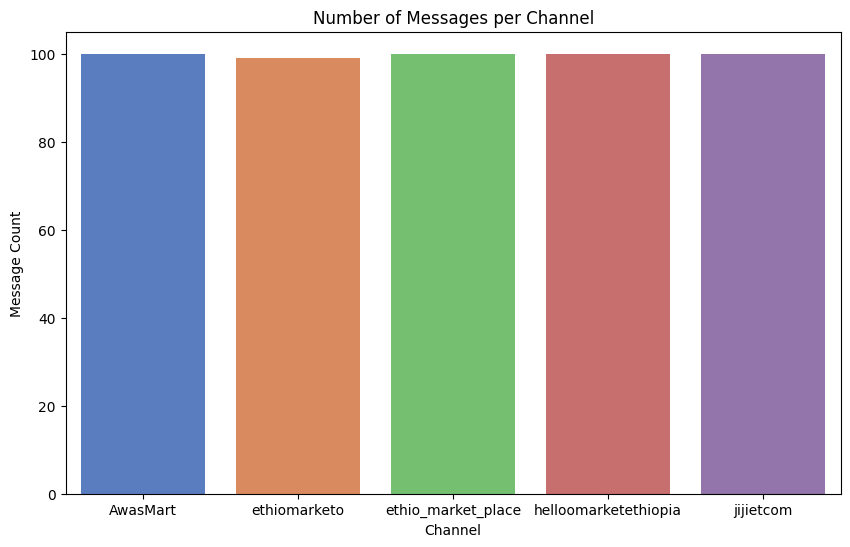

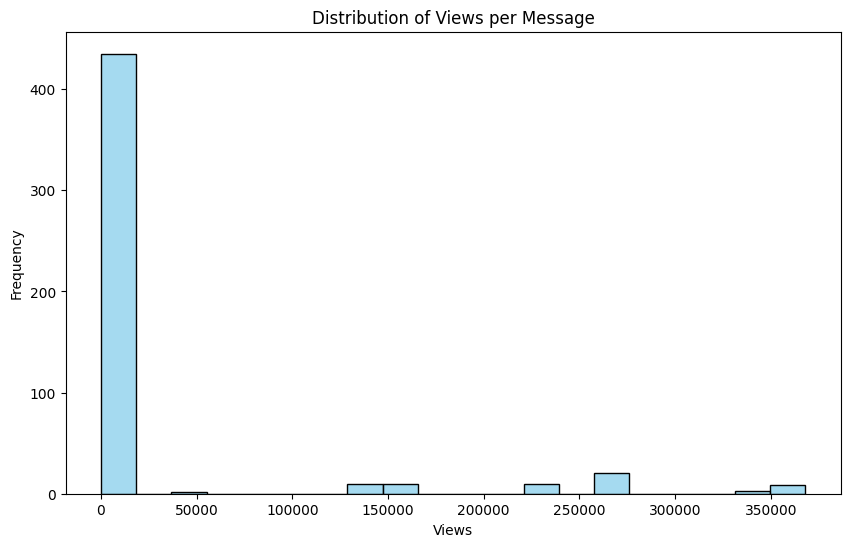

2025-06-22 13:15:39,115 - INFO - Empty or non-string text input received


Raw Text: nan
Processed Text: 

Summary Statistics:
Total Messages: 499
Messages with Media: 494
Average Views per Message: 31118.45

CoNLL Labeled Data Validation:
Total Tokens: 4116
Entity Counts:
  B-Product: 64
  I-Product: 8
  B-LOC: 0
  I-LOC: 0
  B-PRICE: 5
  I-PRICE: 4
  O: 4035


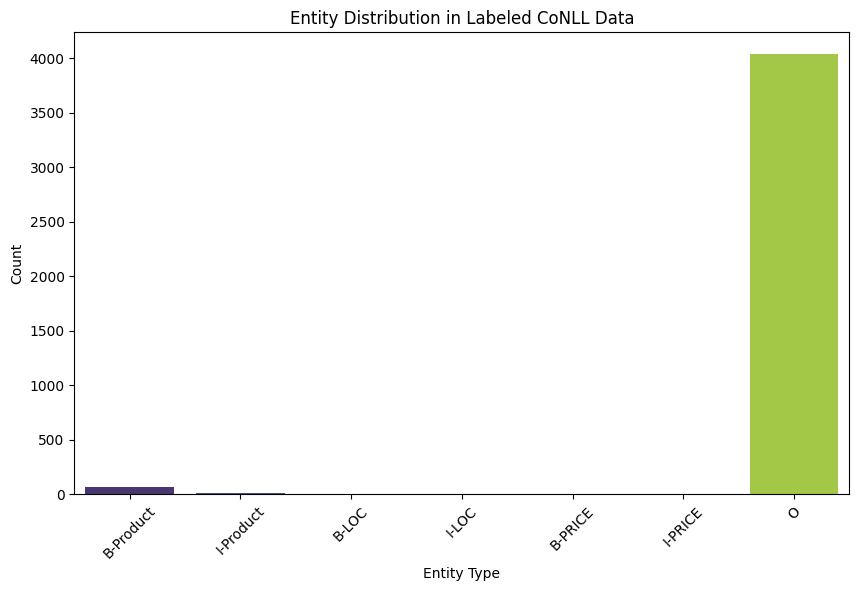

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

    

sys.path.append('../')
from src.preprocessing.preprocess import preprocess_amharic_text




# Load processed data
data_dir = '../data/processed/'
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
if not csv_files:
    print('No CSV files found in data/processed/. Run process_data.py first.')
else:
    df = pd.concat([pd.read_csv(f'{data_dir}{f}', encoding='utf-8') for f in csv_files])
    
    # Display sample data
    print('Sample Data:')
    print(df[['channel', 'text', 'processed_text', 'views']].head(10))
    
    # Message count per channel
    channel_counts = df['channel'].value_counts().reindex([
        '@AwasMart', '@ethiomarketo', '@ethio_market_place',
        '@helloomarketethiopia', '@jijietcom'
    ], fill_value=0)
    # Plot message count per channel
    plt.figure(figsize=(10, 6))
    sns.barplot(x=channel_counts.index.str.replace('@', ''), y=channel_counts.values, palette='muted')
    plt.title('Number of Messages per Channel')
    plt.xlabel('Channel')
    plt.ylabel('Message Count')
    plt.show()
    
    # Views distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['views'].fillna(0), bins=20, color='skyblue')
    plt.title('Distribution of Views per Message')
    plt.xlabel('Views')
    plt.ylabel('Frequency')
    plt.show()
    
    # Preprocessing validation
    sample_text = df['text'].iloc[0] if not df.empty else 'ዋጋ 1000 ብር አዲስ አበባ'
    print(f'Raw Text: {sample_text}')
    print(f'Processed Text: {preprocess_amharic_text(sample_text)}')
    
    # Summary statistics
    print('\nSummary Statistics:')
    print(f'Total Messages: {len(df)}')
    print(f"Messages with Media: {df[['image_path', 'doc_path']].notnull().any(axis=1).sum()}")
    print(f"Average Views per Message: {df['views'].mean():.2f}")
    
    # Validate CoNLL labeled data
    conll_path = '../data/labeled/conll_labeled.txt'
    if os.path.exists(conll_path):
        with open(conll_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()
        
        # Count entities
        entity_counts = {'B-Product': 0, 'I-Product': 0, 'B-LOC': 0, 'I-LOC': 0, 'B-PRICE': 0, 'I-PRICE': 0, 'O': 0}
        for line in lines:
            if line.strip() and not line == '\n':
                label = line.strip().split()[-1]
                if label in entity_counts:
                    entity_counts[label] += 1
        
        print('\nCoNLL Labeled Data Validation:')
        print(f'Total Tokens: {sum(entity_counts.values())}')
        print('Entity Counts:')
        for entity, count in entity_counts.items():
            print(f'  {entity}: {count}')
        
        # Visualize entity distribution
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(entity_counts.keys()), y=list(entity_counts.values()), hue=list(entity_counts.keys()), palette='viridis')
        plt.title('Entity Distribution in Labeled CoNLL Data')
        plt.xlabel('Entity Type')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f'CoNLL file not found at {conll_path}. Run label_conll.py first.')